# Filter in time domain
Different approach. Take the 128 bin frequency domain response. Convert into time domain to get the filter `kernel`. Use as FIR filter coefficients.

In [5]:
%pylab notebook
import scipy.signal
from PIL import Image
from time import sleep

Populating the interactive namespace from numpy and matplotlib


(128, 220)


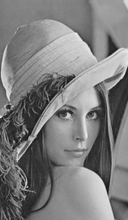

In [2]:
xOffs = 50
img = Image.open("./lenna.png").convert("L")
img = img.crop([xOffs, 0, xOffs+128, img.size[1]])
print(img.size)
imgDat = asarray(img)
img

64


/home/michael/miniconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:416: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.irfft_numpy(a, n=n, axis=axis)


<IPython.core.display.Javascript object>


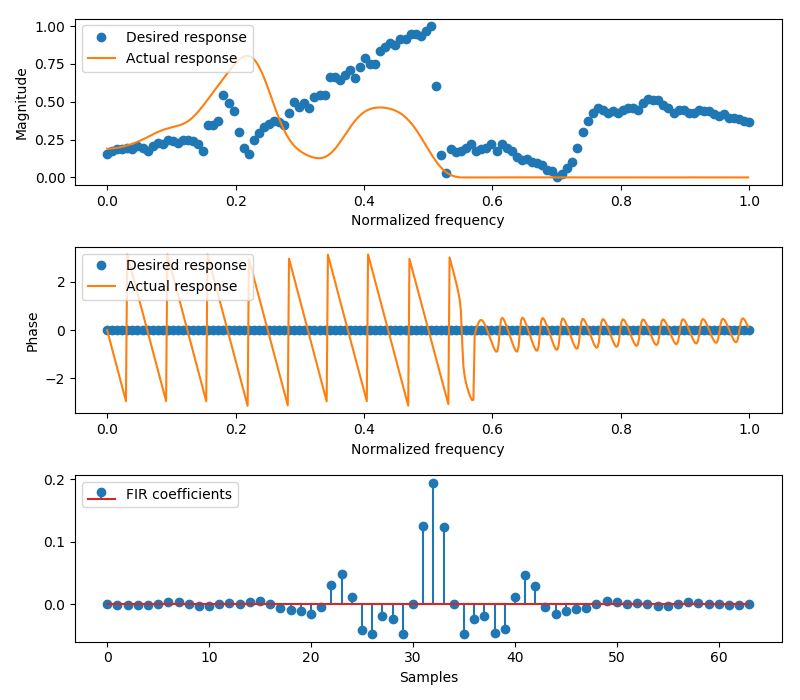

In [57]:
# Get desired frequency response
#h_f = zeros(128)
#h_f[0:5] = 1
#h_f[20:22] = 1
#h_f[40:60] = 0.8
row = imgDat[25, :].astype("float")
# Normalize amplitudes for maximum effect
h_f = row - amin(row)
h_f /= amax(h_f)
M = h_f.size

# Calculate FIR coefficients
h_t = fft.irfft(h_f, 512)
h_t = roll(h_t, h_t.size // 2)

# Make filter faster by trunctation
h_t = getMiddle(h_t, 64)
print(h_t.size)

# Make filter smoother by windowing (stop band attenuation!!)
h_t *= hamming(h_t.size)

# Calculate actual response and plot
close("all")
fig, axs = subplots(3,1, figsize=(8,7))
w, h_ff = scipy.signal.freqz(h_t)
w /= pi
# h_ff = fft.rfft(h_t, 2**16)
# w = linspace(0, 1, h_ff.size)
axs[0].plot(linspace(0, 1, h_f.size), abs(h_f), "o", label="Desired response")
axs[0].plot(w, abs(h_ff), label="Actual response")
axs[0].set_xlabel("Normalized frequency")
axs[0].set_ylabel("Magnitude")
axs[1].plot(linspace(0, 1, h_f.size), angle(h_f), "o", label="Desired response")
axs[1].plot(w, angle(h_ff), label="Actual response")
axs[1].set_xlabel("Normalized frequency")
axs[1].set_ylabel("Phase")
axs[2].stem(h_t, label="FIR coefficients")
axs[2].set_xlabel("Samples")
for ax in axs:
    ax.legend(loc="upper left")
fig.tight_layout()

In [31]:
def getMiddle(arr, N):
    """ return N elements from the center of arr """
    iStart = arr.size // 2 - N // 2
    iStop = arr.size // 2 + N // 2
    if N % 2:
        iStop += 1
    return arr[iStart: iStop]
